<a href="https://colab.research.google.com/github/PutraResearch/Test/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Manipulation and Numerical Operation Library
import pandas as pd
import numpy as np

# Google Drive Integration Library
from google.colab import drive

# Data Visualization Library
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

To gain a better understanding of the dataset, an automated profiling report was generated. This report provides key insights into the dataset, including:
*   LFeature Overview: Summary of each
feature, including missing values, unique values, and value range (min-max).
*   LQuantile Statistics: Key percentiles (e.g., 25%, 50%, 75%) to understand data distribution.
*   LDescriptive Statistics: Mean, standard deviation, skewness, and kurtosis to analyze the characteristics of numerical features.
*   LHistograms: Visual representation of feature distributions.
*   LCorrelation Heatmap: Identifies relationships between numerical features.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfTrain_path = '/content/drive/MyDrive/Kaggle Project/Loan Default Prediction/Dataset/train.csv'
df = pd.read_csv(dfTrain_path)

In [ ]:
df

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0


In [ ]:
num_features = [
    "Annual Income", "Years of Credit History", "Maximum Open Credit",
    "Number of Open Accounts", "Number of Credit Problems", "Months since last delinquent",
    "Bankruptcies", "Current Loan Amount", "Current Credit Balance",
    "Monthly Debt", "Credit Score"
]

for col in num_features:
    fig = px.histogram(df, x=col, nbins=30, title=f"Distribusi {col}", marginal="box")
    fig.show()

# Bivariate Analysis (Hubungan dengan Credit Default) variabel Category

In [ ]:
cat_features = ["Home Ownership", "Years in current job", "Purpose", "Term"]

for col in cat_features:
    fig = px.histogram(df, x=col, color="Credit Default", barmode="group",
                       title=f"{col} vs Credit Default", text_auto=True)  # Tambahkan text_auto untuk label
    fig.show()

# Bivariate Analysis (Hubungan dengan Credit Default) variabel Numerical

NameError: name 'df' is not defined

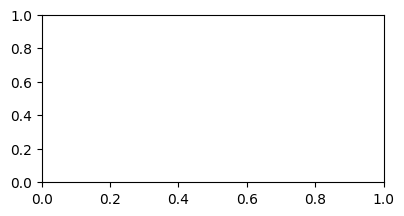

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fitur numerik yang akan dicek
num_features = [
    "Annual Income", "Years of Credit History", "Maximum Open Credit",
    "Number of Open Accounts", "Number of Credit Problems", "Months since last delinquent",
    "Bankruptcies", "Current Loan Amount", "Current Credit Balance",
    "Monthly Debt", "Credit Score"
]

# Histogram untuk melihat distribusi fitur numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


# Analisis Korelasi

In [ ]:
num_features = [
    "Annual Income", "Years of Credit History", "Maximum Open Credit",
    "Number of Open Accounts", "Number of Credit Problems", "Months since last delinquent",
    "Bankruptcies", "Current Loan Amount", "Current Credit Balance",
    "Monthly Debt", "Credit Score"
]

corr_matrix = df[num_features + ["Credit Default"]].corr().round(2)

fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    colorscale="Viridis",
    showscale=True
)

fig.update_layout(title="Correlation Heatmap")
fig.show()

In [ ]:
fig = px.box(df, x="Credit Default", y="Annual Income",
             title="Distribusi Annual Income berdasarkan Credit Default",
             points="all")
fig.show()

In [ ]:
fig = px.histogram(df, x="Number of Credit Problems", color="Credit Default",
                   barmode="group",
                   title="Jumlah Credit Problems vs Credit Default")
fig.show()

In [ ]:
fig = px.box(df, x="Credit Default", y="Maximum Open Credit",
             title="Batas Kredit Maksimum vs Credit Default",
             points="all")
fig.show()

In [ ]:
fig = px.box(df, x="Credit Default", y="Credit Score",
             title="Credit Score vs Credit Default",
             points="all")
fig.show()

In [ ]:
# Pisahkan data berdasarkan default atau tidak
hist_data = [df[df["Credit Default"] == 0]["Monthly Debt"].dropna(),
             df[df["Credit Default"] == 1]["Monthly Debt"].dropna()]
group_labels = ["No Default", "Default"]

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=True)
fig.update_layout(title_text="Density Plot Monthly Debt berdasarkan Credit Default")
fig.show()

In [ ]:
import plotly.express as px

# Buat barplot dengan warna sesuai Credit Default
fig = px.box(df, x="Annual Income", color="Credit Default",
             color_discrete_map={0: "blue", 1: "red"},
             title="Annual Income vs Credit Default")

# Tampilkan plot
fig.show()


<Axes: xlabel='Annual Income', ylabel='Count'>

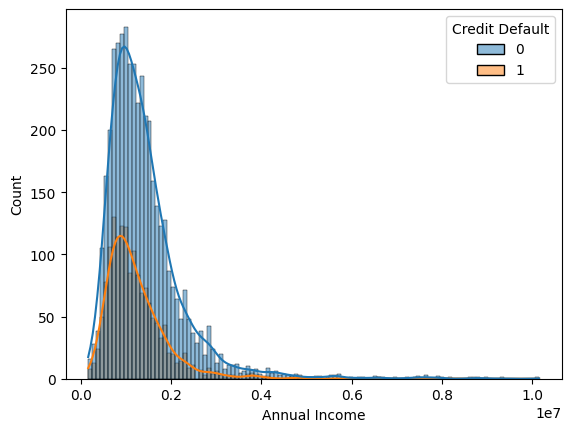

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df, x="Annual Income", hue="Credit Default",kde=True)

In [ ]:
import scipy.stats as stats
fig = px.histogram(
    df,
    x="Annual Income",
    color="Credit Default",
    nbins=50,  # Menentukan jumlah bin
    marginal="rug",  # Menampilkan sebaran data (opsional)
    opacity=0.6,  # Transparansi warna
    histnorm="density"  # Normalisasi agar sebanding dengan KDE
)
for category in df["Credit Default"].unique():
    subset = df[df["Credit Default"] == category]["Current Credit Balance"]
    kde_x = np.linspace(subset.min(), subset.max(), 1000)
    kde_y = stats.gaussian_kde(subset)(kde_x)

    fig.add_trace(go.Scatter(
        x=kde_x,
        y=kde_y,
        mode="lines",
        name=f"KDE Credit Default {category}",
        line=dict(width=2)
    ))

# Menyesuaikan tata letak
fig.update_layout(
    title="Histogram & KDE of Annual Income by Credit Default",
    xaxis_title="Annual Income",
    yaxis_title="Density",
    barmode="overlay"
)

# Tampilkan plot
fig.show()

In [ ]:
# Membuat histogram dengan Plotly (skala density)
fig = px.histogram(
    df,
    x="Annual Income",
    color="Credit Default",
    nbins=50,
    opacity=0.6,
    histnorm="probability density"  # Menggunakan skala density agar sesuai KDE
)

# Menambahkan KDE secara manual
for category in df["Credit Default"].unique():
    subset = df[df["Credit Default"] == category]["Current Credit Balance"]

    # Hitung KDE
    kde_x = np.linspace(subset.min(), subset.max(), 1000)
    kde = stats.gaussian_kde(subset)
    kde_y = kde(kde_x)

    # Scaling KDE agar lebih sesuai dengan histogram
    kde_y_scaled = kde_y * len(subset) / 10  # Sesuaikan scaling

    fig.add_trace(go.Scatter(
        x=kde_x,
        y=kde_y_scaled,
        mode="lines",
        name=f"KDE Credit Default {category}",
        line=dict(width=2)
    ))

# Menyesuaikan tata letak
fig.update_layout(
    title="Histogram & KDE of Annual Income by Credit Default",
    xaxis_title="Annual Income",
    yaxis_title="Density",
    barmode="overlay"
)

# Tampilkan plot
fig.show()

In [ ]:
from scipy.stats import norm

<ipython-input-40-e8f90a6bd123>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0, 0.5, 'Frequency')

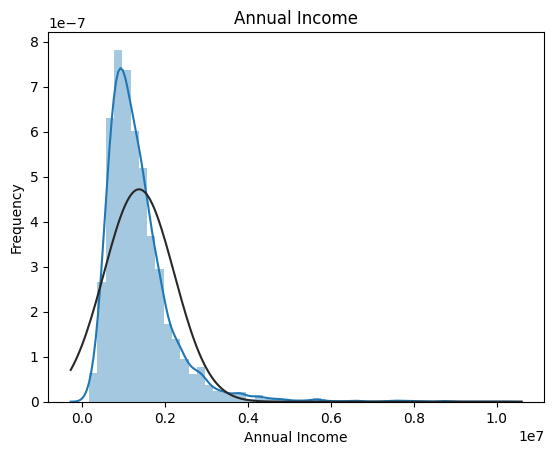

In [ ]:
from scipy.stats import norm
sns.distplot(df['Annual Income'], fit=norm);
plt.title('Annual Income')
plt.ylabel('Frequency')

In [ ]:
fig = px.histogram(df, x="Home Ownership", color="Credit Default",
                   barmode="group",
                   title="Home Ownership vs Credit Default")
fig.show()